<a href="https://colab.research.google.com/github/Calaside/GTM-Setup---Challenge-2/blob/main/D_Remy_Customers_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Orders clustering

a) Execute the cell below to load  the data into a `df` variable.

It will select 50k orders randomly (`ORDER BY rand()` in the SQL query).

In [ ]:
from google.colab import auth
import pandas as pd

# get credentials
auth.authenticate_user()

query = '''
SELECT turnover_grocery, turnover_beauty, turnover_baby, turnover_home, turnover_fresh, promo_rate
FROM `data-analytics-bootcamp-363212.course33.gwz_orders_segmentation`
ORDER BY rand()
LIMIT 50000
'''
df = pd.read_gbq(query, project_id="data-analytics-bootcamp-363212")
df.head()

<ipython-input-1-40120a5a6a92>:13: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.read_gbq(query, project_id="data-analytics-bootcamp-363212")


turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0             77.03             0.00           0.00           0.00   
1              0.00            58.24           0.00           0.00   
2             16.10            88.67           0.00          30.54   
3              0.00             6.45          84.46           0.00   
4             71.30            42.77           0.00          26.53   

   turnover_fresh  promo_rate  
0             0.0    0.067831  
1             0.0    0.095433  
2             0.0         NaN  
3             0.0    0.167226  
4             0.0    0.025252

In [ ]:
df.isnull().sum()

turnover_grocery        0
turnover_beauty         0
turnover_baby           0
turnover_home           0
turnover_fresh          0
promo_rate          16048
dtype: int64

In [ ]:
df['promo_rate'] = df['promo_rate'].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   turnover_grocery  50000 non-null  float64
 1   turnover_beauty   50000 non-null  float64
 2   turnover_baby     50000 non-null  float64
 3   turnover_home     50000 non-null  float64
 4   turnover_fresh    50000 non-null  float64
 5   promo_rate        50000 non-null  float64
dtypes: float64(6)
memory usage: 2.3 MB


In [ ]:
df_orders = df.drop(columns = 'promo_rate')

In [ ]:
df_orders

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0                 77.03             0.00           0.00           0.00   
1                  0.00            58.24           0.00           0.00   
2                 16.10            88.67           0.00          30.54   
3                  0.00             6.45          84.46           0.00   
4                 71.30            42.77           0.00          26.53   
...                 ...              ...            ...            ...   
49995             33.28             9.81          10.08           0.00   
49996              0.00             0.00           0.00          27.31   
49997              0.00            33.15           0.00           0.00   
49998              0.00            35.89           0.00           0.00   
49999            209.38             0.00           0.00           0.00   

       turnover_fresh  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
49995             0.0  
49996             0.0  
49997             0.0  
49998             0.0  
49999             0.0  

[50000 rows x 5 columns]

In [ ]:
df_orders.max(axis = 0)

turnover_grocery    2285.11
turnover_beauty     1163.63
turnover_baby       1733.10
turnover_home       1081.50
turnover_fresh        92.65
dtype: float64

In [ ]:
import plotly.express as px

fig = px.box(df_orders, points = 'all')
fig.show()

In [ ]:
df_orders = df_orders.drop(columns = 'turnover_fresh')

In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

df_orders_scaled = scale.fit_transform(df_orders)

In [ ]:
from sklearn.cluster import KMeans

distorsion = {}
for k in range(1, 11):
  kmeans = KMeans(n_clusters = k, max_iter= 1000).fit(df_orders_scaled)
  distorsion[k] = kmeans.inertia_

In [ ]:
fig = px.scatter(x = distorsion.keys(), y = distorsion.values())
fig.show()

In [ ]:
inertias = []
n_k = range(1, 10)

# for each number of centroids
for k in n_k:

    # your code here

In [ ]:
# your code here

In [ ]:
kmeans_100 = KMeans(n_clusters = 3, n_init = 100, max_iter= 1000).fit(df_orders_scaled)

In [ ]:
labels = kmeans_100.predict(df_orders_scaled)

In [ ]:
import numpy as np
np.unique(labels, return_counts = True)

(array([0, 1, 2], dtype=int32), array([28010, 12482,  9508]))

<Axes: ylabel='count'>

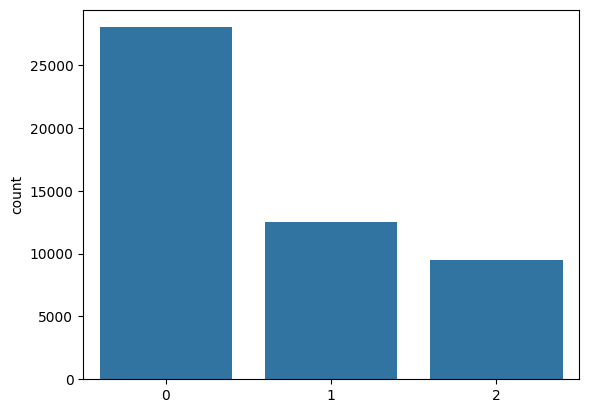

In [ ]:
import seaborn as sb

sb.countplot(x = labels)

One bigger cluster... but overall, orders are well distributed.

In [ ]:
centroids = kmeans_100.cluster_centers_

In [ ]:
centroids

array([[-0.39764693,  0.3251235 , -0.37897271,  0.20766242],
       [ 1.26526167, -0.36005161, -0.41430625, -0.24009188],
       [-0.48651111, -0.48549503,  1.65812208, -0.29684103]])

In [ ]:
centroids = pd.DataFrame(centroids, columns = df_orders.columns)

In [ ]:
centroids

turnover_grocery  turnover_beauty  turnover_baby  turnover_home
0         -0.397647         0.325123      -0.378973       0.207662
1          1.265262        -0.360052      -0.414306      -0.240092
2         -0.486511        -0.485495       1.658122      -0.296841

In [ ]:
df['label'] = labels

In [ ]:
centroids['label'] = ['beauty_and_home', 'grocery', 'baby']

In [ ]:
centroids

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0         -0.397647         0.325123      -0.378973       0.207662   
1          1.265262        -0.360052      -0.414306      -0.240092   
2         -0.486511        -0.485495       1.658122      -0.296841   

             label  
0  beauty_and_home  
1          grocery  
2             baby

In [ ]:
df[df["promo_rate"] > 0].groupby("label").size() / df.groupby("label").size()

label
0    0.651125
1    0.764060
2    0.649348
dtype: float64